## Sales Data Analysis
This data contains the following columns 

Row ID	, Order ID	, Order Date	,  Ship Date	,  Ship Mode	, Customer ID	,  Customer Name	, Segment	, Country	, City	, State	, Postal Code	, Region	, Product ID	, Category	, Sub-Category	, Product Name	, Sales.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Check The Data

In [3]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Documenti\Data_Science\NTECH TRAINING\EXCEL CLASS\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.describe()

## SALES ANALYSIS

In [6]:
total_sales = df['Sales'].sum()
print(f'Total Sales: ${total_sales:.2f}')

Total Sales: $2261536.78


In [ ]:
# Sales variation across different countries
sales_by_country = df.groupby('Country')['Sales'].sum()
# Sales variation across different categories
sales_by_category = df.groupby('Category')['Sales'].sum()

# Sales variation across different sub-categories
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum()

# Print the results
print("Sales Variation Across Different Countries:")
print(sales_by_country)

print("\n Sales Variation Across Different Categories:")
print(sales_by_category)

print("\nSales Variation Across Different Sub-Categories:")
print(sales_by_subcategory)

Sales Variation Across Different Countries:
Country
United States    2.261537e+06
Name: Sales, dtype: float64

 Sales Variation Across Different Categories:
Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

Sales Variation Across Different Sub-Categories:
Sub-Category
Accessories    164186.7000
Appliances     104618.4030
Art             26705.4100
Binders        200028.7850
Bookcases      113813.1987
Chairs         322822.7310
Copiers        146248.0940
Envelopes       16128.0460
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76828.3040
Phones         327782.4480
Storage        219343.3920
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64


#### NOTICEABLE TREND IN SALES OVER TIME

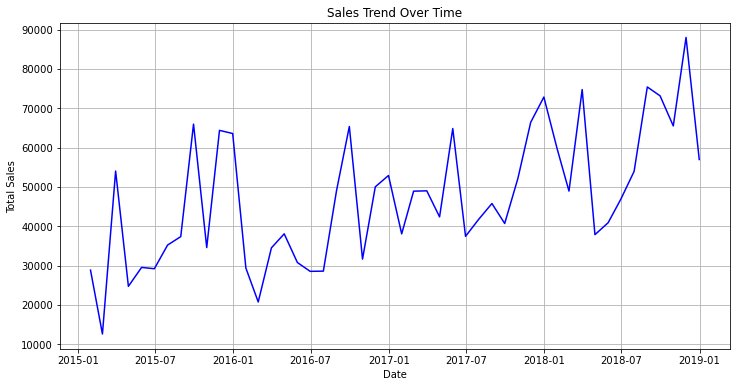

In [16]:
# set 'order date' as datetime'
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Set 'order date'
df.set_index('Order Date', inplace=True)
# Resample the data by month and sum the sales
monthly_sales = df.resample('M')['Sales'].sum()



# Plotting the trend in sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values,  color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

The month of January has the least sales that falls below 30000, it increased at the middle of the month and drops and drops again at the seventh month of the year. The analysis shows that there is always high sales at the begining of the year.

 ## SHIPPING ANALYSIS

In [26]:
common_shipping_mode = df['Ship Mode'].mode()[0]
print(f'Most common shipping mode: {common_shipping_mode}')

Most common shipping mode: Standard Class


In [38]:
shippng_segment_correlation = df.groupby(['Ship Mode','Segment']).size().unstack()
print('Correlation Between Shipping Mode and Customer Segment:')
print(shippng_segment_correlation)

Correlation Between Shipping Mode and Customer Segment:
Segment         Consumer  Corporate  Home Office
Ship Mode                                       
First Class          755        468          278
Same Day             312        114          112
Second Class        1003        589          310
Standard Class      3031       1782         1046


## Customer Analysis

In [43]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False)
print('Top Customers on Total Sales:')
print(top_customers.head())

Top Customers on Total Sales:
Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


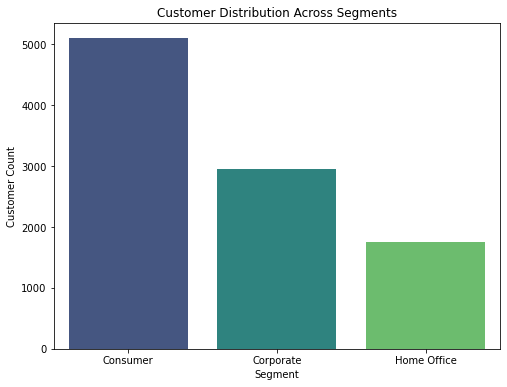

In [56]:
# Calculate customer count per segment
segment_counts = df['Segment'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Distribution Across Segments')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.show()

Consumer Segment  has the highest number of customers with over 5101 customers
Next to it is the Corporate Segment with 2953 customers
Then Home Office  segment with  1746 customers

## Product Analysis

Text(0, 0.5, 'Sales')

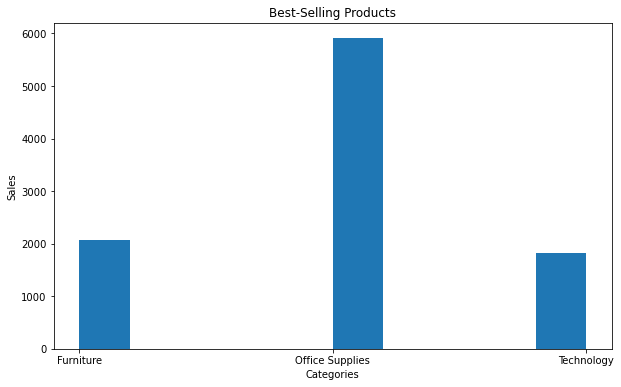

In [20]:
# Sort the DataFrame by sales in descending order
#df['Shipping ']

# Plot the best-selling products
plt.figure(figsize=(10, 6))
plt.hist(x = df['Category'] )
plt.title('Best-Selling Products')
plt.xlabel('Categories')
plt.ylabel('Sales')

Office Supplies  is the highest sales in terms of category with 5909 sales
Next to it is Furniture with 2078 sales
then Technology category with 1813 sales


In [ ]:
# Applying boolean algebra to filter data
filtered_data1 = df[(df['Region'] == 'South') & (df['Sales'] < 1000)]

# Display the filtered data
filtered_data1.head(7)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-05-29,534,CA-2017-168753,01/06/2017,Second Class,RL-19615,Rob Lucas,Consumer,United States,Montgomery,Alabama,36116.0,South,TEC-PH-10000984,Technology,Phones,Panasonic KX-TG9471B,979.950
2015-01-11,4069,CA-2015-102673,05/11/2015,Standard Class,KH-16630,Ken Heidel,Corporate,United States,Charlotte,North Carolina,28205.0,South,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,978.840
2018-02-11,4881,CA-2018-143567,05/11/2018,Second Class,TB-21175,Thomas Boland,Corporate,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",975.920
2016-03-21,6487,CA-2016-120621,26/03/2016,Standard Class,JW-16075,Julia West,Consumer,United States,Jacksonville,North Carolina,28540.0,South,OFF-AP-10002945,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,962.080
2017-12-18,289,CA-2017-112697,20/12/2017,Second Class,AH-10195,Alan Haines,Corporate,United States,Tamarac,Florida,33319.0,South,OFF-SU-10000646,Office Supplies,Supplies,Premier Automatic Letter Opener,961.480
2018-03-11,8821,CA-2018-100622,07/11/2018,Standard Class,DK-13090,Dave Kipp,Consumer,United States,Orlando,Florida,32839.0,South,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,959.984
2017-04-01,2898,US-2017-164630,09/01/2017,Standard Class,EB-13975,Erica Bern,Corporate,United States,Charlotte,North Carolina,28205.0,South,TEC-CO-10000971,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,959.968


In [92]:
#Applying boolean algebra to filter data
filtered_data2 = df[(df['Region'] == 'West') | (df['Sales'] == 1000)]

# Display the filtered data
filtered_data2.head(7)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2018-03-23,8154,CA-2018-140151,25/03/2018,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960
2015-07-25,2506,CA-2015-143917,27/07/2015,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,San Francisco,California,94122.0,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.650
2018-10-13,8859,CA-2018-135909,20/10/2018,Standard Class,JW-15220,Jane Waco,Corporate,United States,Sacramento,California,95823.0,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960
2017-03-13,5885,CA-2017-136301,15/03/2017,Second Class,EH-13765,Edward Hooks,Corporate,United States,San Francisco,California,94109.0,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,4912.590
2018-01-04,4219,CA-2018-149881,03/04/2018,First Class,NC-18535,Nick Crebassa,Corporate,United States,San Francisco,California,94110.0,West,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4799.984
2017-10-21,7819,CA-2017-138478,26/10/2017,Second Class,DP-13390,Dennis Pardue,Home Office,United States,North Las Vegas,Nevada,89031.0,West,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,4535.976
2017-06-24,9166,CA-2017-100300,26/06/2017,Second Class,MJ-17740,Max Jones,Consumer,United States,San Diego,California,92037.0,West,TEC-MA-10000984,Technology,Machines,Okidata MB760 Printer,4476.800


In [102]:
# Define sales ranges
low_sales_range = 300
high_sales_range = 700

# Conditional statement to filter data based on sales ranges
if (df['Sales'] > high_sales_range).any():
    filtered_data = df[df['Sales'] > high_sales_range]
    print("High Sales Range:")
    print(filtered_data.head().unstack())
elif (df['Sales'] < low_sales_range).any():
    filtered_data = df[df['Sales'] < low_sales_range]
    print("Low Sales Range:")
    print(filtered_data.head().unstack())
else:
    print("No sales data in the specified range.")

High Sales Range:
        Order Date
Row ID  2015-03-18         2698
        2017-02-10         6827
        2018-03-23         8154
        2018-10-22         2624
        2018-11-17         4191
                        ...    
Sales   2015-03-18     22638.48
        2017-02-10     17499.95
        2018-03-23     13999.96
        2018-10-22    11199.968
        2018-11-17     10499.97
Length: 85, dtype: object
